In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from wordcloud import WordCloud

In [5]:
filepath = './dataset/TMDb_updated.CSV/TMDb_updated.CSV'

In [6]:
df = pd.read_csv(filepath, sep=',', header=0, index_col=0)
df

,title,overview,original_language,vote_count,vote_average
0,Ad Astra,"The near future, a time when both hope and har...",en,2853,5.9
1,Bloodshot,"After he and his wife are murdered, marine Ray...",en,1349,7.2
2,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,en,2530,7.1
3,Ant-Man,Armed with the astonishing ability to shrink i...,en,13611,7.1
4,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",en,3542,5.9
...,...,...,...,...,...
9995,Cargo,The story of CARGO takes place on rusty space-...,de,225,5.9
9996,The Good Night,"Gary, a musician, is trapped in an unhappy rel...",en,67,5.6
9997,The World Is Yours,"To escape his life of crime, a Paris drug deal...",fr,234,7.1
9998,The Grand Seduction,A small fishing village must procure a local d...,en,169,6.7


In [12]:
language_info = df.original_language.value_counts().reset_index()
lang_sum = language_info.original_language.sum()
language_info['portion'] = language_info.original_language.apply(lambda x: x / lang_sum)
language_info

,index,original_language,portion
0,en,8326,0.8326
1,fr,385,0.0385
2,ja,269,0.0269
3,it,152,0.0152
4,es,145,0.0145
5,de,96,0.0096
6,ko,92,0.0092
7,cn,72,0.0072
8,zh,71,0.0071
9,hi,70,0.0070


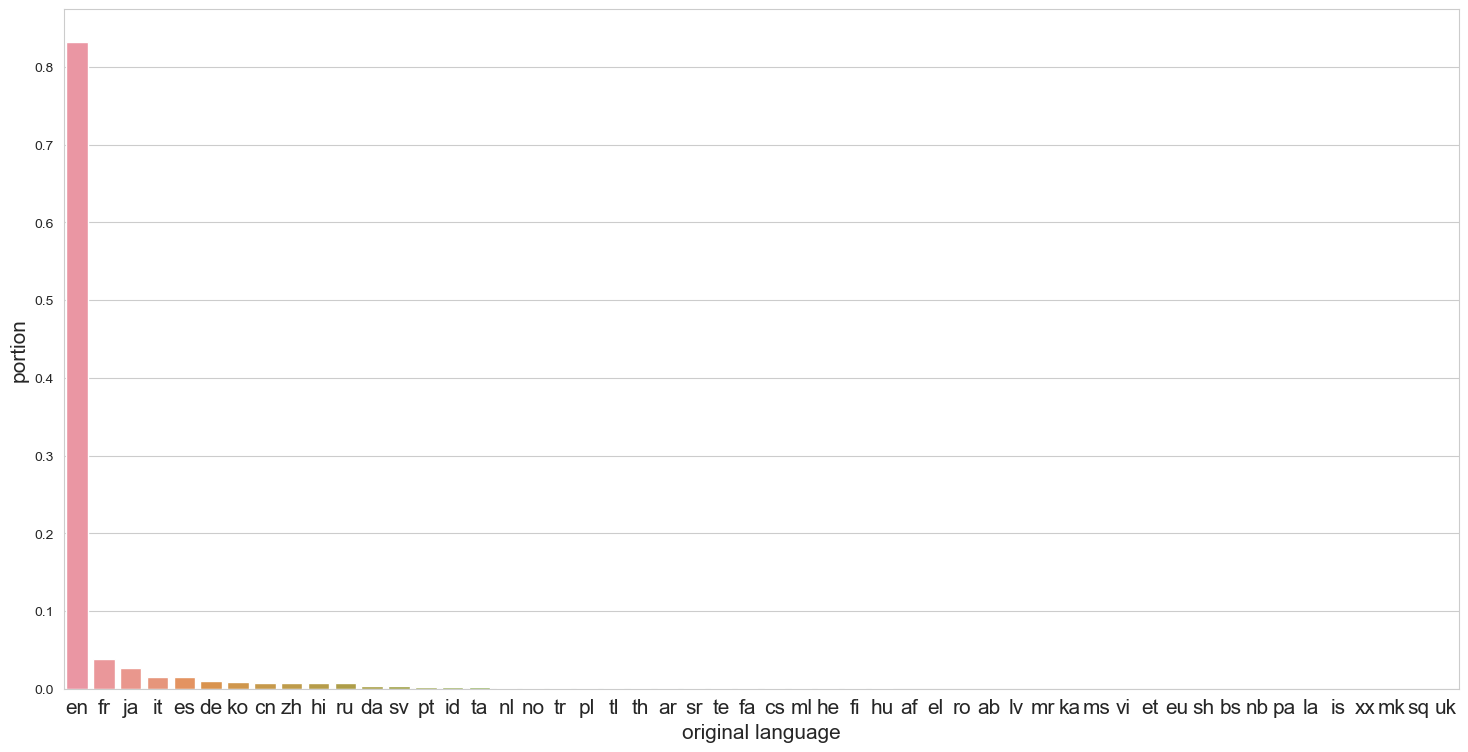

In [25]:
plt.figure(figsize=[18, 9], dpi=100)
ax = sns.barplot(data=language_info, x='index', y='portion')
ax.set_xticklabels(labels=language_info['index'].values.tolist(), rotation=0, fontsize=15)
plt.xlabel('original language', fontsize=15)
plt.ylabel('portion', fontsize=15)
plt.savefig('./figure/TMDb/original_language.png')

In [28]:
vote_average_info = df.vote_average.value_counts().reset_index()
vote_average_info

,index,vote_average
0,6.4,433
1,6.6,419
2,6.1,416
3,6.2,412
4,6.3,407
...,...,...
67,2.4,2
68,3.2,1
69,9.8,1
70,1.8,1


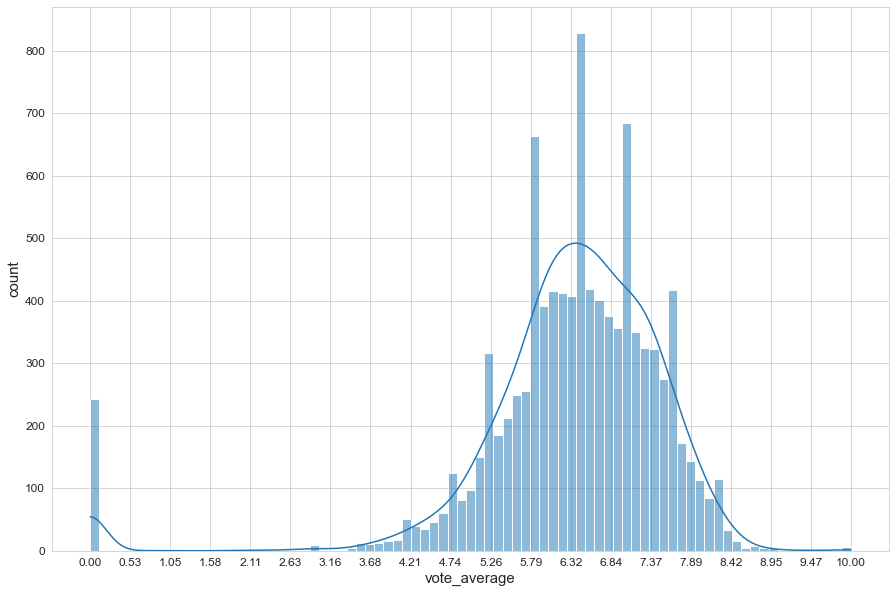

In [61]:
plt.figure(figsize=(15, 10))
ax = sns.histplot(data=df, x='vote_average', kde=True)
plt.xlabel('vote_average', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.xticks(np.linspace(0, 10, 20), fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('./figure/TMDb/vote_average.png', dpi=400)
plt.show()

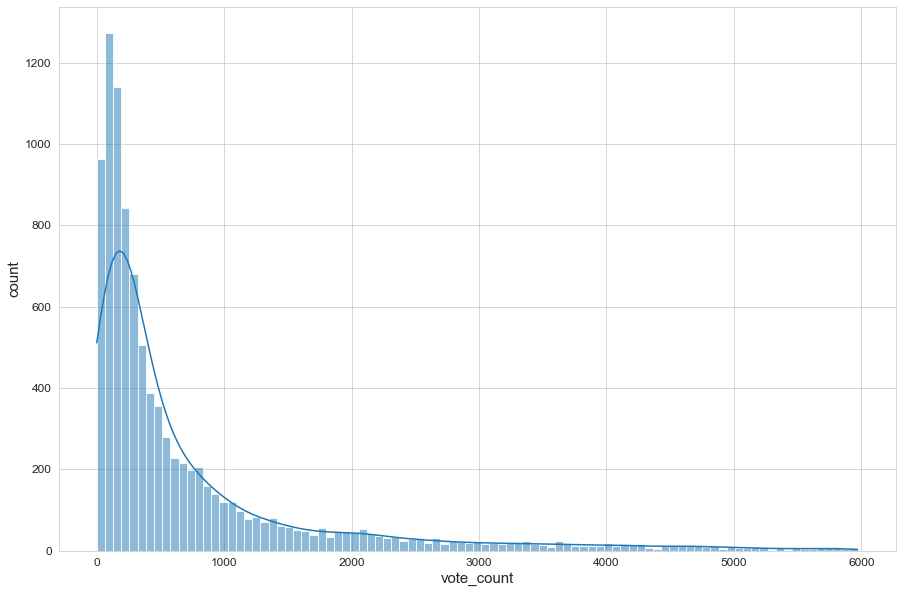

In [64]:
newdf = df[df.vote_count < 6000]
plt.figure(figsize=(15, 10))
sns.histplot(data=newdf, x='vote_count', kde=True)
plt.xlabel('vote_count', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('./figure/TMDb/vote_count.png', dpi=400)
plt.show()

<Figure size 1440x1440 with 0 Axes>

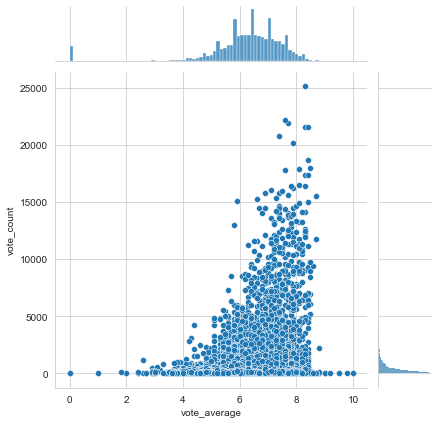

In [70]:
plt.figure(figsize=(20, 20))
sns.jointplot(data=df, x='vote_average', y='vote_count')
plt.savefig('./figure/TMDb/vote_joint.png', dpi=400)
plt.show()

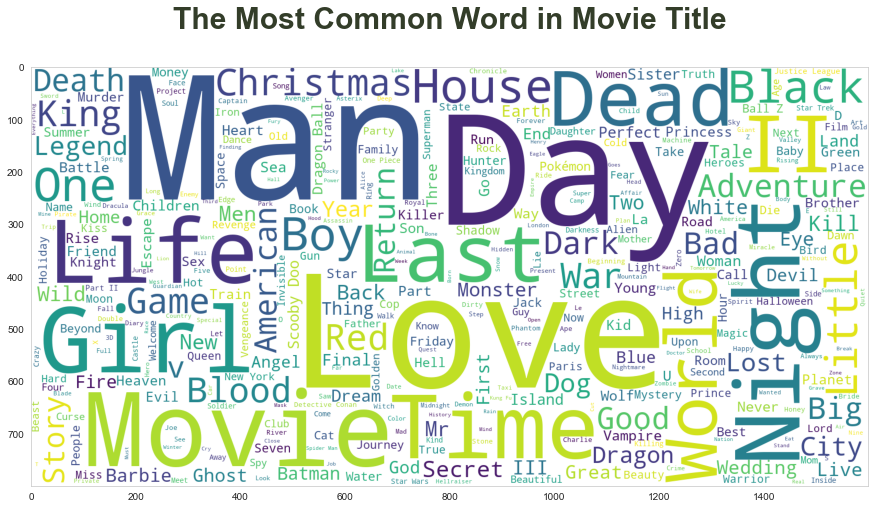

In [86]:
plt.figure(figsize=(15, 10))
plt.title('The Most Common Word in Movie Title\n', fontsize=30, weight=600, color='#333d29')
wc = WordCloud(max_words=1000, min_font_size=10, height=800, width=1600, background_color='white').generate(' '.join(df.title))
plt.grid(visible=False)
plt.imshow(wc)
plt.savefig('./figure/TMDb/title_cloud.png', dpi=800)